# Anotações durante o aceleraDev DS

Básicas


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Leitura e escrita de arquivos**

In [2]:
df_csv = pd.read_csv('exemplo.csv') #lendo CSV
df_csv = pd.read_csv('exemplo.csv',sep = ',', decimal = '.') #lendo CSV com separador ";" e o decimal ","
df_json = pd.read_json('exemplo.json')
df_csv.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


**Conceitos imprecindíveis para entendimento das medidas abaixo**




***Análise exploratória*** = "Procedimento para analisar dados, técnicas para interpretar os resultados de tais procedimentos, formas de planejar a reuniao dos dados para tornar sua analise mais fácil, mais preisa ou mais exata e toda a maquinária e os requistados da estatística (matemática) que se aplicam a analise de dados" (John W. Tukey")


***Desvio padrão*** = Medida de dispersão que diz o quando o conjunto de dados é uniforme. Próximo de zero eles não variam muito, alto os dados variam bastante. O cálculo é 
A = [0,1,2,3]
n = Quantidade de itens
Amédia = Média dos valores
B = Soma de (A - Amédia)
C = B²
D = Raiz(C / n)

***Distribuição normal*** = É uma curva com formato de "sino", onde o meio da curva é a MÉDIA, 65% dos dados estão a 1 desvio padrão de distancia (para + ou -), 95% a 2 desvios padrão e 99,7% a 3 desvios padrão. Uma forma de identifica é se a média, mediana e moda dão o mesmo valor.

***Assimetria (skewness)***= É o grau de distorção da curva simétrica a distribuição normal. SE a skewness for igual a 0, a curva é simétrica, caso contrário é positiva (esquerda da média) ou negativa (direita da média).

***Curtose (kurtosis)*** = é uma medida de dispersão que caracteriza o "achatamento" da curva. 
	Mesocurticas(0) = achatamento da distribuição normal;			      (igual a distribuição normal)
	Leptocúrtica( > 0) = Possui a curva da função de distribuição mais afunilada. (tem um pico maior e é a mais alta)
	Platicurtica( < 0) = Possui a curva mais achatada que a distribuição normal.  (É mais achatada e é a mais baixa)
    
***Padronização***: Resulta em uma média igual a 0 e um desvio padrão igual a 1. Indicado para distribuições Gaussianas.    

Transformar todas as variáveis na mesma ordem de grandeza. 

***Padronizar*** = Padronizar as variáveis irá ersultar em uma média igual a0 e um desbio padrão igual a 1.
***Normalizar*** = Normalizar tem como objetivo colocar as variáveis dentro do intervalor de 0 e 1, caso tenha resultado negativo -1 e 1.

Quando a mediana é mt diferente da média, é sinal que tenha outliers. Quando o desvio padrão é mt alto, significa que os dados são mt separados.

**Correlação**

Medida padronizada da relação entre duas variáveis;

Indica a força e a direção do relacionamento de duas variáveis aleatórias;

Correlação não é causalidade

***Spearman*** = Avalia a relação monotonica entre duas variáveis continuas ou ordinais. Mudam juntas mas não necessariamente a uma taxa constante. O coeficiente de correlação de spearman baseia-se nos valores classiicados de cada variavels, em vez de os dados brutos.

***Pearson*** = Relação linear enrte duas variaveis continuas. Mudança em uma variável é associada a uma mudança proporcional na outra variavel.

Correlação vai de -1 a 1. Quando está próximo de 0, não há correlação entre as variáveis. Quando está próximo a 1, se movem juntas e a -1 em sentido contrário. Quando está igual a 1, elas estão perfeitamente correlacionada positivamente, e a -1 é perfeitamente correlacionada negativamente.

In [ ]:
df_csv.sum(axis = 1) #Soma as linhas
df_csv['Purchase'].mean() #Média
df_csv['Purchase'].median() #Mediana
df_csv['Purchase'].mode() #Moda
df_csv['Purchase'].std() #Desvio padrão
df_csv.std() #Desvio padrão de todas as colunas
df_csv['Purchase'].skew() #Assimetria
df_csv['Purchase'].kurtosis() #Curtose
df_csv[['Purchase','Purchase 2']].corr(method = 'spearman')

**Análises**

In [14]:
# Loop para verificar correlação de uma variável com as outras do tipo inteiro no dataframe
aux = pd.DataFrame({'colunas' : df_csv.columns,'tipos' :df_csv.dtypes}) # Criando um dataframe com as colunas e os tipos
lista = aux[aux['tipos'] == 'int64']['colunas']
for coluna in lista:
    print(coluna)
    print(df_csv[['Purchase',coluna]].corr(method = 'spearman'))

User_ID
          Purchase   User_ID
Purchase  1.000000  0.004306
User_ID   0.004306  1.000000
Occupation
            Purchase  Occupation
Purchase    1.000000    0.022587
Occupation  0.022587    1.000000
Marital_Status
                Purchase  Marital_Status
Purchase        1.000000        0.001758
Marital_Status  0.001758        1.000000
Product_Category_1
                    Purchase  Product_Category_1
Purchase            1.000000           -0.369058
Product_Category_1 -0.369058            1.000000
Purchase
          Purchase  Purchase
Purchase       1.0       1.0
Purchase       1.0       1.0


**Visualização de dados**

***Histograma***

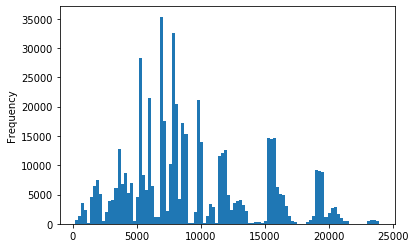

In [40]:
df_csv['Purchase'].plot(kind = 'hist',bins= 100) #kind é o tipo, bins é a escala
plt.show()

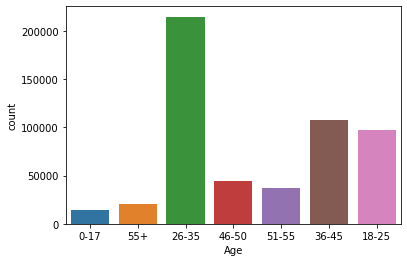

In [39]:
sns.countplot(x = 'Age', data = df_csv)
plt.show()

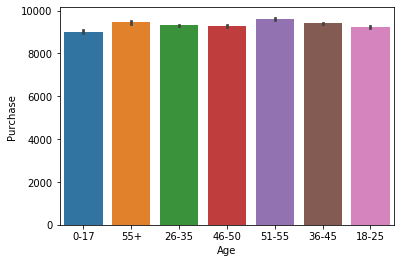

In [38]:
#Soma de compra
sns.barplot(x = 'Age', y = 'Purchase', data = df_csv)
plt.show()

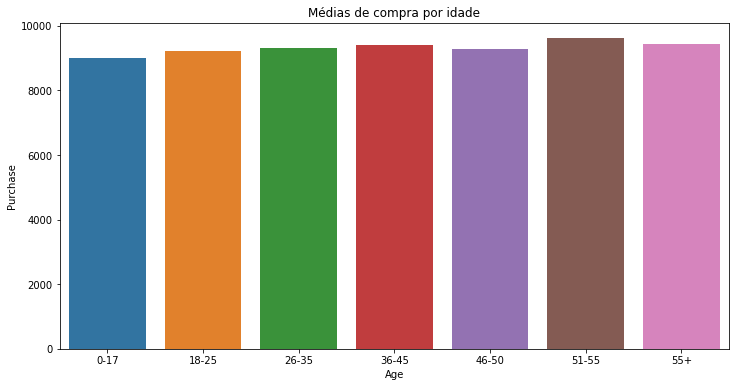

In [37]:
# Média de compra
plt.figure(figsize = (12,6)) #Definir o tamanho do gráfico
sns.barplot(x = 'Age', y = 'Purchase', data = df_csv.groupby('Age')['Purchase'].mean().reset_index()) 
plt.title('Médias de compra por idade') #Título do gráfico
plt.xticks(rotation = 0) #Rotação da legenda
plt.show()

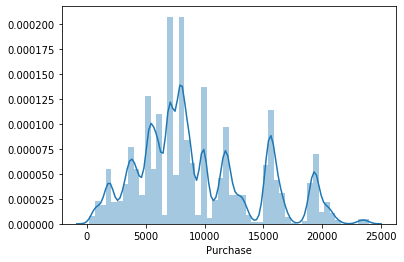

In [42]:
sns.distplot(df_csv['Purchase'])
plt.show()

In [ ]:
#Boxplot = Separa os quartis e exibe os outliers como pontos.








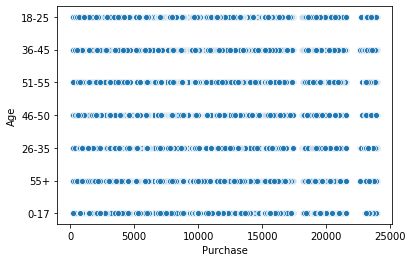

In [5]:
#Dispersão = pontos em um plano cartesiano
sns.scatterplot(x = 'Purchase', y = 'Age', data = df_csv)
plt.show()

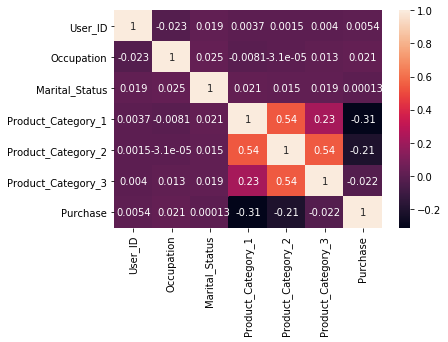

In [9]:
#Matriz de correlação = Relação de correlação entre as variáveis
sns.heatmap(df_csv.corr(), annot = True)
plt.show()

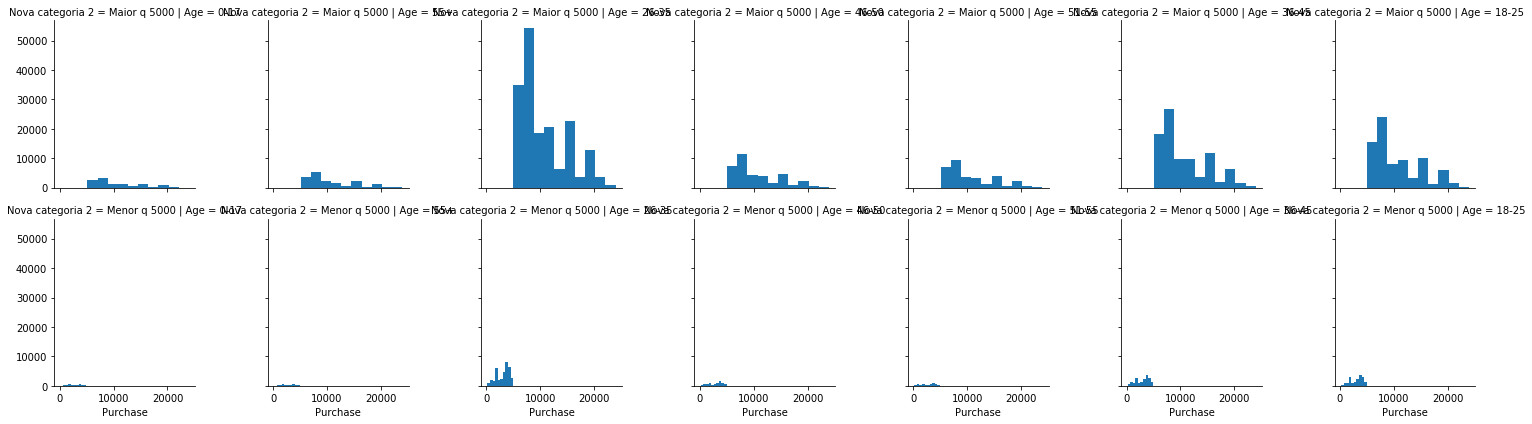

In [10]:
g = sns.FacetGrid(df_csv, col = 'Age', row = 'Nova categoria 2')
g = g.map(plt.hist,'Purchase')